**NOTE 1**

Saya menggunakan scrapy untuk webscrapping.

Python code scrapping nya ada di folder:
alg_caps_webscrapping/imdb/spiders/imdb2019.py

**Note 2**

Hasil scrap saya simpan sebagai file movies.csv

Total titles di imdb (url: https://www.imdb.com/search/title/?release_date=2019-01-01,2019-12-31) ada 308,330 titles.

Kode saya seharusnya bisa berhasil scrap semua titles. 
Tapi untuk project capstone ini, saya hentikan prosesnya scraping sampai 12.450 movies saja.


In [80]:
import pandas as pd 

In [81]:
movies = pd.read_csv('movies.csv')

In [82]:
movies

,judul,imdb_rating,metascore,votes
0,Star Wars: Episode IX - The Rise of Skywalker,6.7,53.0,319569.0
1,The Mandalorian,8.7,NaN,167214.0
2,After Life,8.5,NaN,67224.0
3,Dead to Me,8.1,NaN,37344.0
4,Once Upon a Time... in Hollywood,7.7,NaN,462631.0
...,...,...,...,...
12445,Sanjher Baati,NaN,NaN,NaN
12446,Theo's Formula,9.4,NaN,7.0
12447,Chris Ramsey Approval Needed,7.2,NaN,26.0
12448,FX Mayans M.C. Season 2: First Look,NaN,NaN,NaN


In [83]:
movies.dtypes

judul           object
imdb_rating    float64
metascore      float64
votes          float64
dtype: object

**ANSWER 1**


Saya search Google, definisi popularity menurut imdb adalah ini:

"The popularity rating of a particular title on IMDb indicates how much that title’s page has been visited in the current week on IMDb in it’s area of interest"

Kita tidak ada akses ke data title's page visit count. Tapi di imdb, kita bisa sort by popularity.

Ketika saya scrape, webpage sedang dalam kondisi Sort by Popularity. Sehingga untuk mendapat 7 film paling populer, saya tinggal melakukan head(7).




In [84]:
movies.head(7)

,judul,imdb_rating,metascore,votes
0,Star Wars: Episode IX - The Rise of Skywalker,6.7,53.0,319569.0
1,The Mandalorian,8.7,NaN,167214.0
2,After Life,8.5,NaN,67224.0
3,Dead to Me,8.1,NaN,37344.0
4,Once Upon a Time... in Hollywood,7.7,NaN,462631.0
5,The Gentlemen,7.9,51.0,130509.0
6,Parasite,8.6,NaN,402351.0


**ANSWER 2**

Sebagai alternatif lain, dan juga untuk praktik data wrangling, saya mencoba mendefinisikan popularitas sebagai jumlah votes. 

In [85]:
movies.sort_values(by='votes', ascending = False)

,judul,imdb_rating,metascore,votes
13,Joker,8.5,59.0,784313.0
12,Avengers: Endgame,8.4,NaN,714877.0
4,Once Upon a Time... in Hollywood,7.7,NaN,462631.0
18,Chernobyl,9.4,NaN,460386.0
54,Captain Marvel,6.9,NaN,410791.0
...,...,...,...,...
12443,InstaFAME,NaN,NaN,NaN
12444,Darlin,NaN,NaN,NaN
12445,Sanjher Baati,NaN,NaN,NaN
12448,FX Mayans M.C. Season 2: First Look,NaN,NaN,NaN


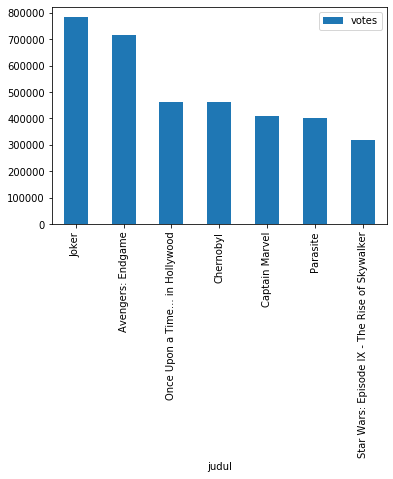

In [86]:
movies.sort_values(by='votes', ascending = False).head(7).plot.bar(x='judul', y='votes')